In [8]:
from collections import defaultdict

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
!pip install -q ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

def get_data_from_uci(id=144):
    statlog_german_credit_data = fetch_ucirepo(id=144)

    X = statlog_german_credit_data.data.features
    y = statlog_german_credit_data.data.targets

    return X, y

X, y = get_data_from_uci(144)

In [4]:
X.head()

Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A143        A152            2        A173            1   
1           22        A143        A152            1        A173            1   
2           49        A143        A152            1        A172            2   
3           45        A143        A153            1        A173            2   
4           53        A143        A153            2        A173            2   

  Attribute19 Attribute20  
0        A192        A201  
1        A191        A201  
2        A191        A201  
3        A191        A201  
4        A191        A201

In [5]:
le = [
    'Attribute1',
    'Attribute3',
    'Attribute4',
    'Attribute6',
    'Attribute7',
    'Attribute9',
    'Attribute10',
    'Attribute12',
    'Attribute14',
    'Attribute15',
    'Attribute17',
    'Attribute19',
    'Attribute20',
]

## Benchmarks

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bX, by = X.copy(), y.copy()

label_enc = LabelEncoder()
label_enc.fit(bX[le].to_numpy().flatten())
for col in le:
    bX.loc[:, (col)] = label_enc.transform(bX[col])

norm = StandardScaler()
norm.fit(bX)
bX = pd.DataFrame(data=norm.transform(bX), columns=bX.columns)

# norm = RobustScaler()
# norm.fit(bX)
# bX = pd.DataFrame(data=norm.transform(bX), columns=bX.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bX, by, test_size=0.33,
                                                    random_state=42)

In [ ]:
def get_benchmarks():
    benchmarks_acc = {}

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train.to_numpy().ravel())
    benchmarks_acc['LogReg'] = accuracy_score(y_test, clf.predict(X_test))

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train.to_numpy().ravel())
    benchmarks_acc['KNN'] = accuracy_score(y_test, neigh.predict(X_test))

    rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)
    rf.fit(X_train, y_train.to_numpy().ravel())
    benchmarks_acc['RandForest'] = accuracy_score(y_test, rf.predict(X_test))

    return pd.DataFrame(data=benchmarks_acc.values(),
                        index=benchmarks_acc.keys(),
                        columns=['Accuracy'])


In [ ]:
get_benchmarks()

Accuracy
LogReg      0.766667
KNN         0.760606
RandForest  0.760606

## EDA

In [6]:
label_enc = LabelEncoder()
label_enc.fit(X[le].to_numpy().flatten())

for col in le:
    X.loc[:, (col)] = label_enc.transform(X[col])


In [7]:
X.head()

Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0          3           6         29         34        1169         44   
1          4          48         27         34        5951         40   
2         10          12         29         37        2096         40   
3          3          42         27         33        7882         40   
4          3          24         28         30        4870         40   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0         49           4         52           0            4           5   
1         47           2         51           0            2           5   
2         48           2         52           0            3           5   
3         48           2         52           2            4           6   
4         47           3         52           0            4           8   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67          13          15            2          19            1   
1           22          13          15            1          19            1   
2           49          13          15            1          18            2   
3           45          13          16            1          19            2   
4           53          13          16            2          19            2   

  Attribute19 Attribute20  
0          22          23  
1          21          23  
2          21          23  
3          21          23  
4          21          23

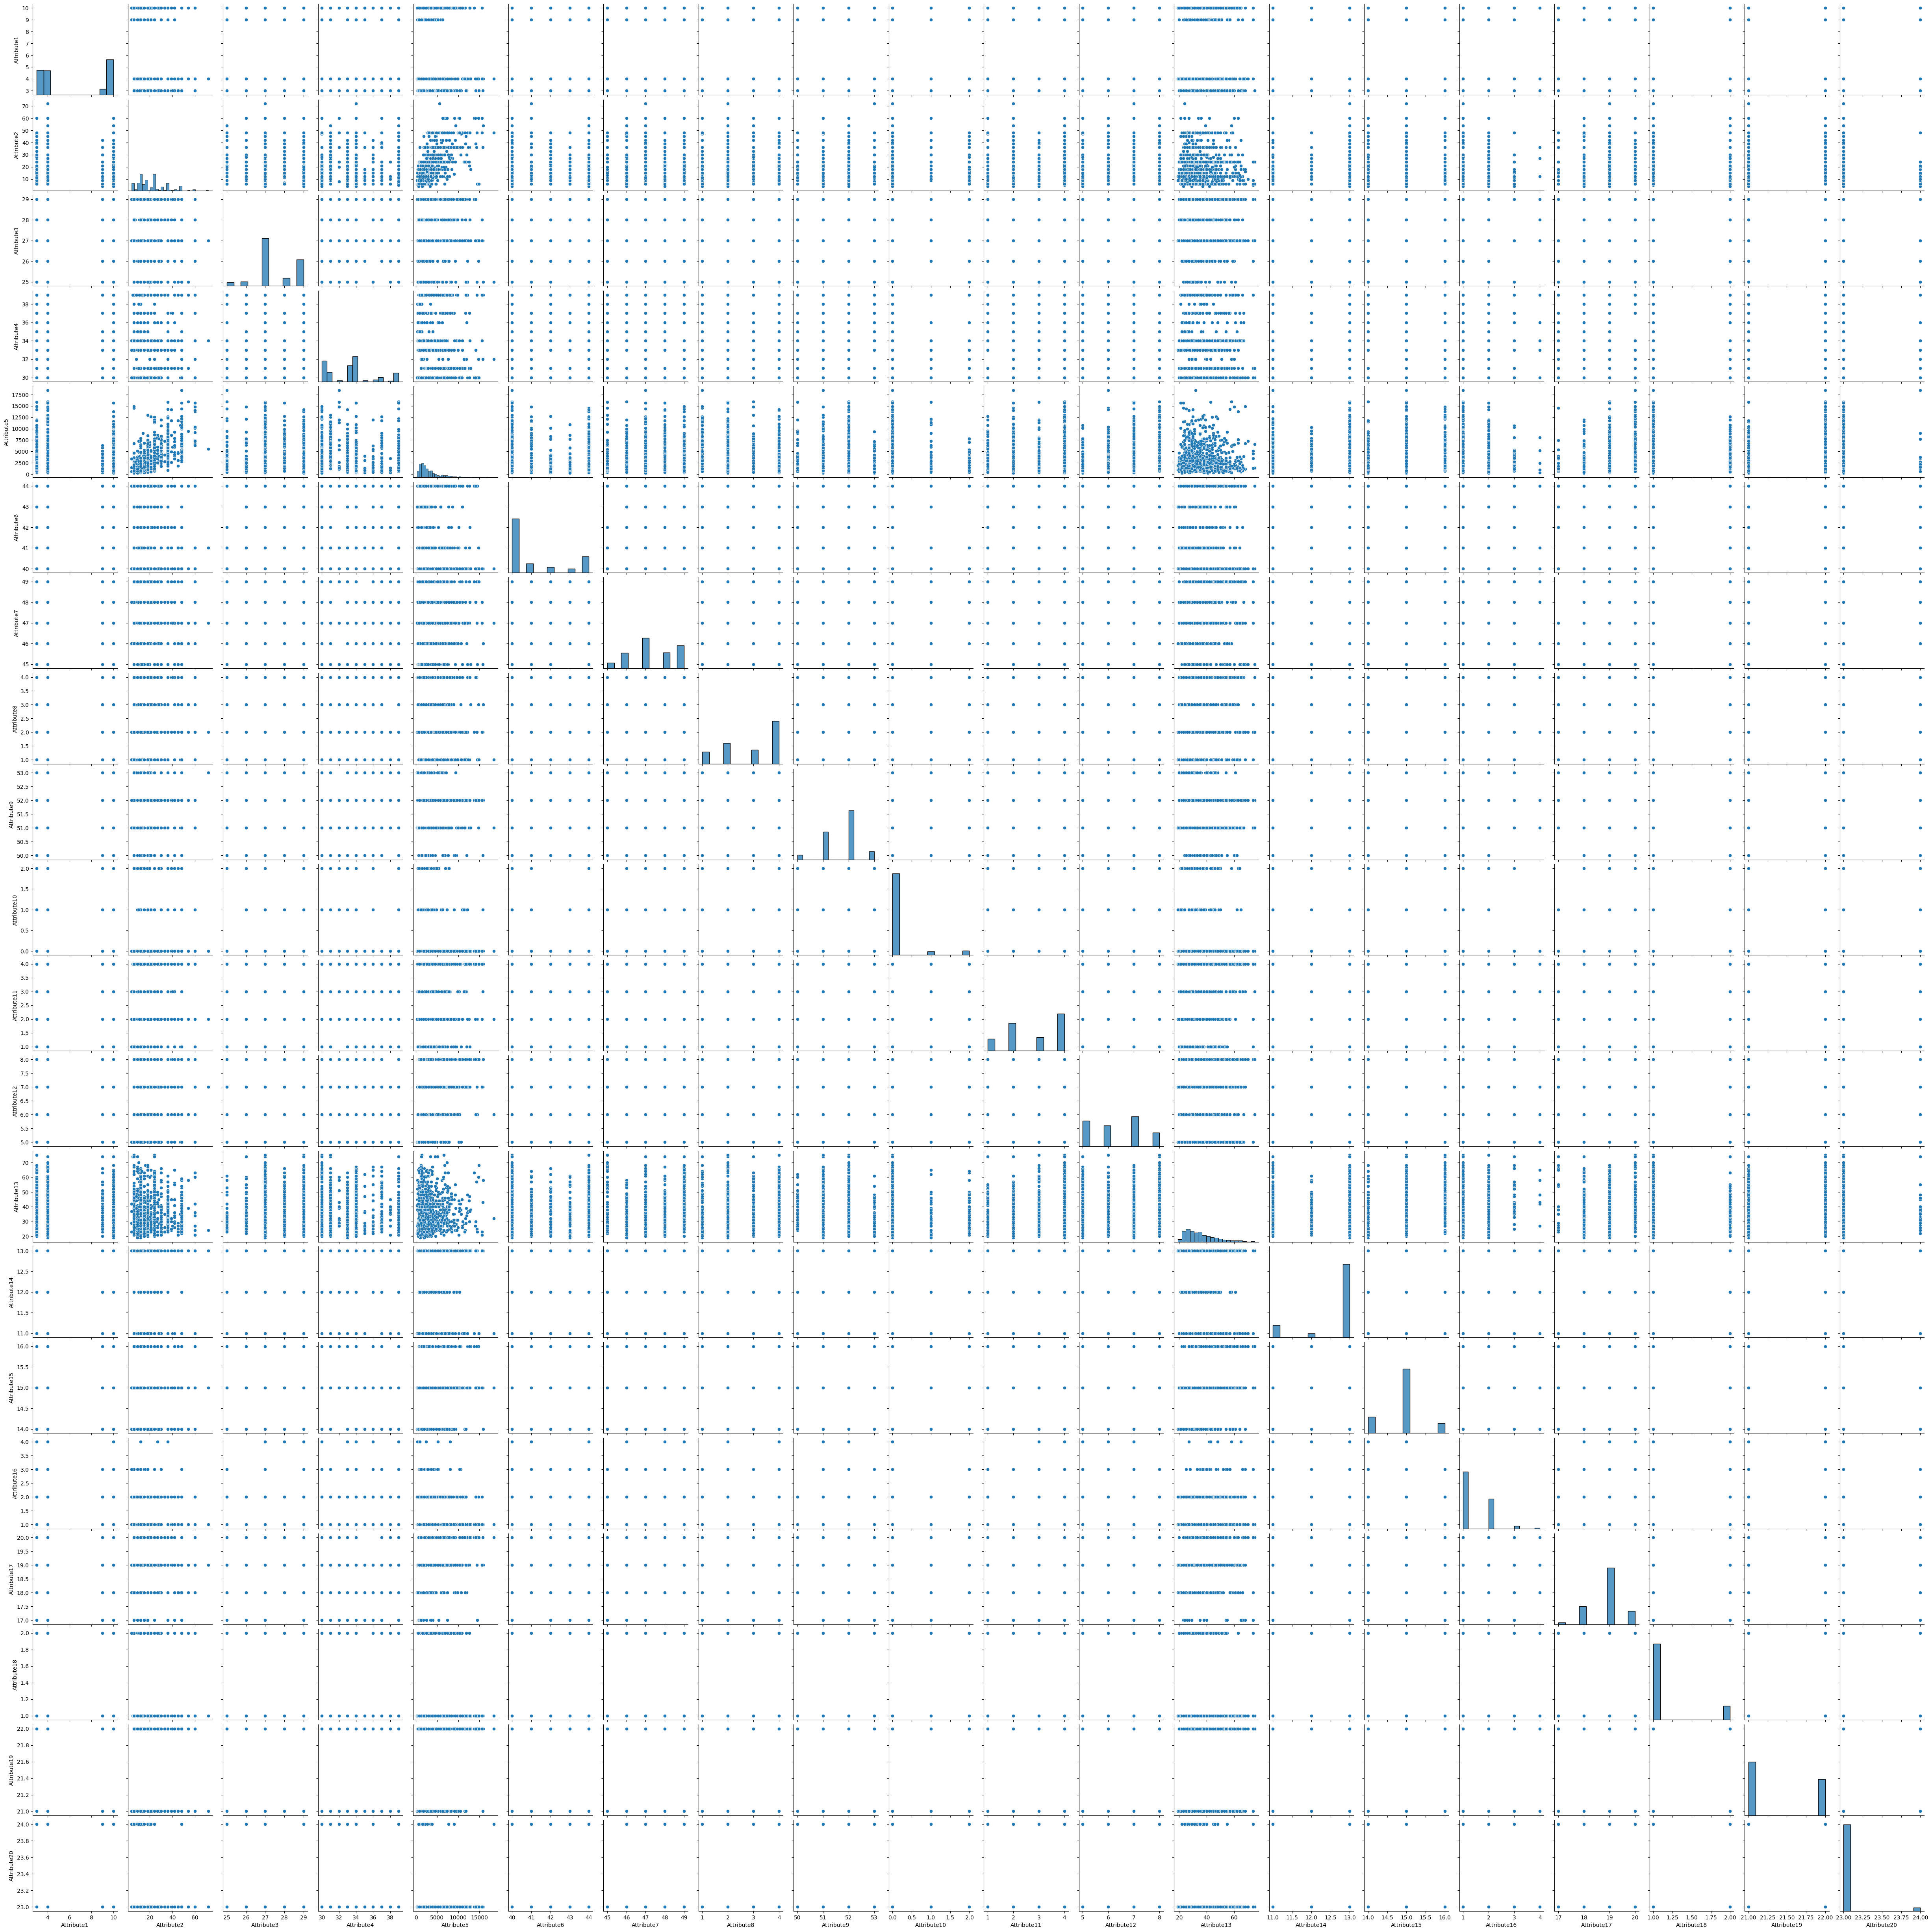

In [10]:
sns.pairplot(X) # need to exclude 2 5 13

## K-means

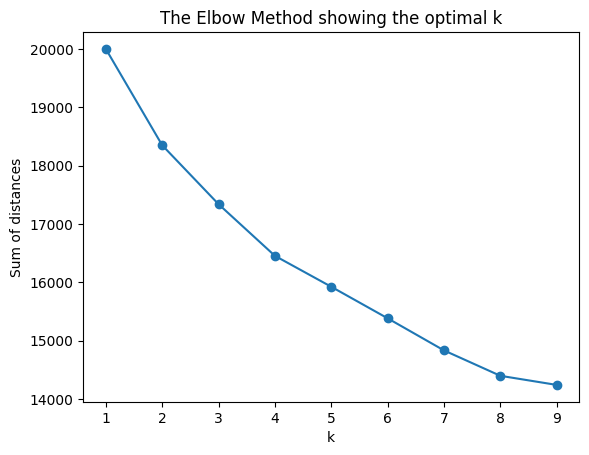

In [ ]:
norm = StandardScaler()
norm.fit(X)
df = norm.transform(X)

K = range(1, 10)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
norm = StandardScaler()
DATA = {
    'all data': norm.fit_transform(X),
    'without label encoder data': norm.fit_transform(X.loc[:, ~X.columns.isin(le)]),
    'only label encoder data': norm.fit_transform(X[le])
}

robust = RobustScaler()
robust_DATA = {
    'all data': robust.fit_transform(X),
    'without label encoder data': robust.fit_transform(X.loc[:, ~X.columns.isin(le)]),
    'only label encoder data': robust.fit_transform(X[le])
}

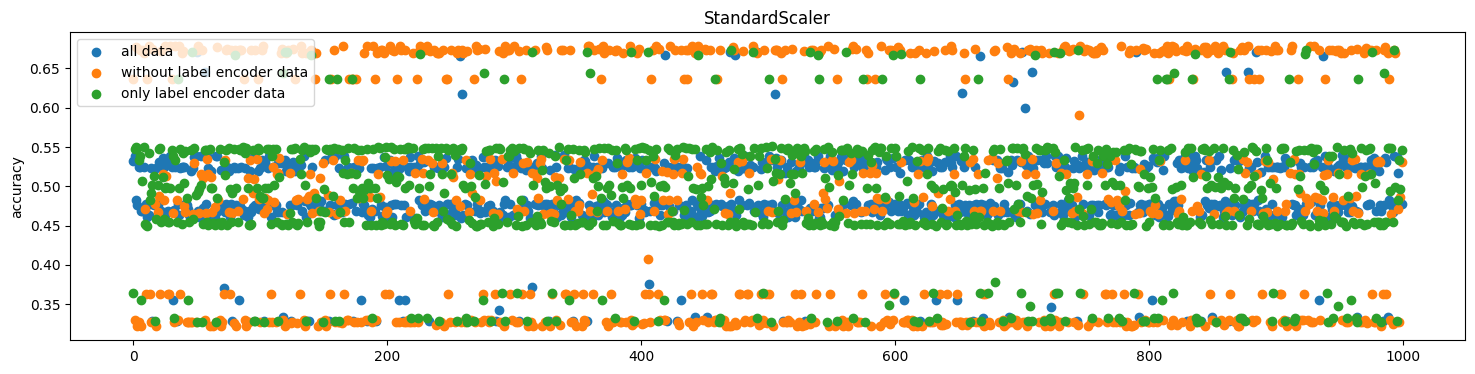

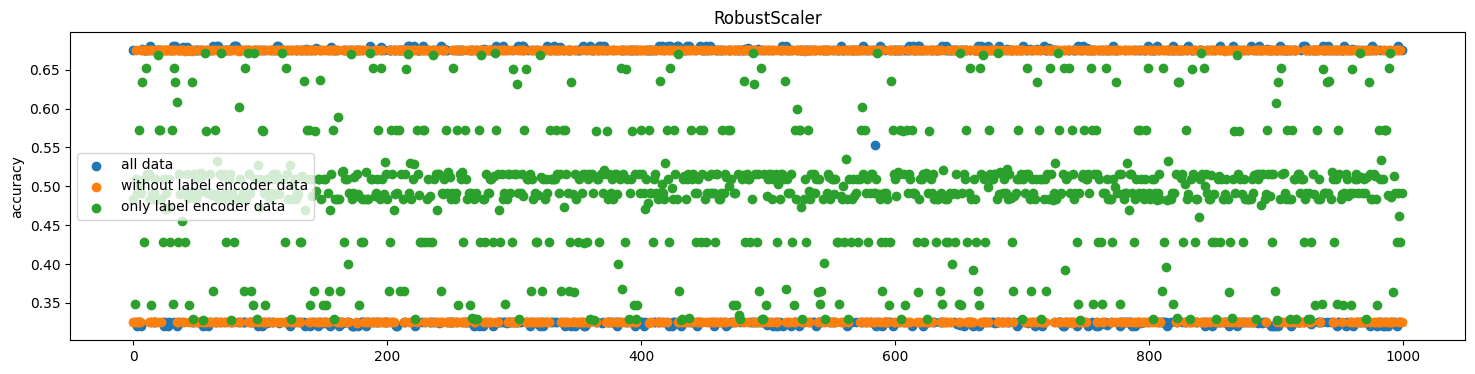

In [ ]:
acc_results = {
    'StandardScaler': defaultdict(list),
    'RobustScaler': defaultdict(list),
}

model = KMeans(n_clusters=2)


plt.figure(figsize=(18, 4))
for key, data in DATA.items():
    for _ in range(1_000):
        model.fit(data)
        acc_results['StandardScaler'][key].append(accuracy_score(y, model.labels_+1))

    plt.scatter(np.arange(1_000), acc_results['StandardScaler'][key], label=key)

plt.title('StandardScaler')
plt.ylabel('accuracy')
plt.legend()


plt.figure(figsize=(18, 4))
for key, data in robust_DATA.items():
    for _ in range(1_000):
        model.fit(data)
        acc_results['RobustScaler'][key].append(accuracy_score(y, model.labels_+1))

    plt.scatter(np.arange(1_000), acc_results['RobustScaler'][key], label=key)

plt.title('RobustScaler')
plt.ylabel('accuracy')
plt.legend()


In [ ]:
for scaler, results in acc_results.items():
    print(scaler)
    for key, value in results.items():
        print(key)
        print(f'max: {np.max(value)}, min: {np.min(value)}, median: {round(np.mean(value), 4)}')
        print('='*50)
    print()

StandardScaler
all data
max: 0.671, min: 0.329, median: 0.4913
without label encoder data
max: 0.678, min: 0.322, median: 0.4884
only label encoder data
max: 0.673, min: 0.327, median: 0.4902

RobustScaler
all data
max: 0.68, min: 0.32, median: 0.5065
without label encoder data
max: 0.675, min: 0.324, median: 0.5406
only label encoder data
max: 0.672, min: 0.328, median: 0.4937



## Change number of columns

In [ ]:
df = pd.DataFrame(data=norm.fit_transform(X[le]), columns=X[le].columns)
df.head()

Attribute1  Attribute3  Attribute4  Attribute6  Attribute7  Attribute9  \
0   -1.063596    1.344014    0.264068    1.833169    1.338078    0.449326   
1   -0.751233   -0.503428    0.264068   -0.699707   -0.317959   -0.963650   
2    1.122945    1.344014    1.359785   -0.699707    0.510060    0.449326   
3   -1.063596   -0.503428   -0.101171   -0.699707    0.510060    0.449326   
4   -1.063596    0.420293   -1.196889   -0.699707   -0.317959    0.449326   

   Attribute10  Attribute12  Attribute14  Attribute15  Attribute17  \
0    -0.303686    -1.293723     0.460831     0.133710     0.146949   
1    -0.303686    -1.293723     0.460831     0.133710     0.146949   
2    -0.303686    -1.293723     0.460831     0.133710    -1.383771   
3     3.885083    -0.341055     0.460831     2.016956     0.146949   
4    -0.303686     1.564281     0.460831     2.016956     0.146949   

   Attribute19  Attribute20  
0     1.214598    -0.196014  
1    -0.823318    -0.196014  
2    -0.823318    -0.196014  
3    -0.823318    -0.196014  
4    -0.823318    -0.196014

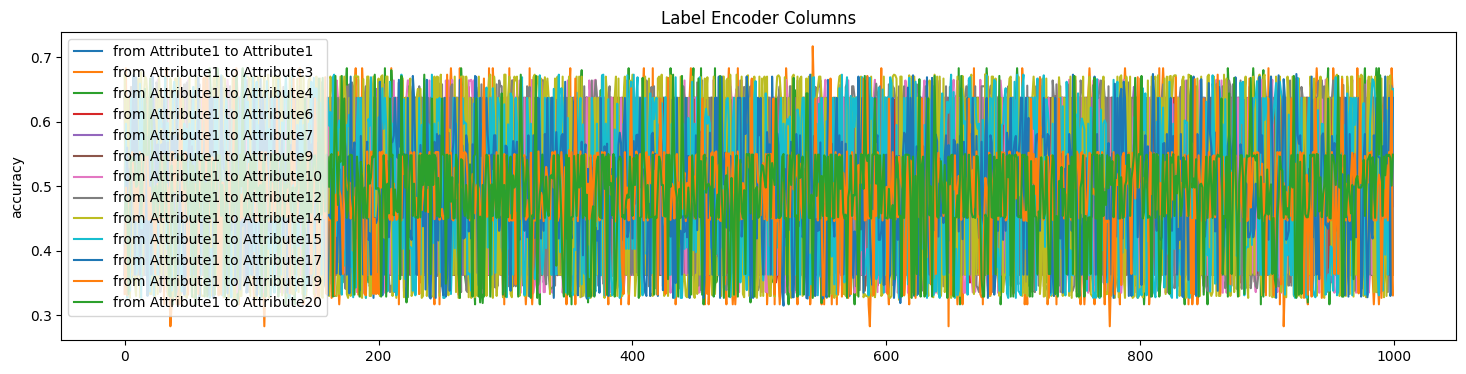

In [ ]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))
for col in df.columns:
    for _ in range(1_000):
        model.fit(df.loc[:, df.columns[0]:col])
        acc_results[col].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[col], label=f'from {df.columns[0]} to {col}')

plt.title('Label Encoder Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
acc_df.head()

Attribute1  Attribute3  Attribute4  Attribute6  Attribute7  Attribute9  \
0       0.363       0.514       0.637       0.363       0.637       0.363   
1       0.637       0.683       0.637       0.637       0.367       0.363   
2       0.637       0.363       0.637       0.363       0.637       0.637   
3       0.363       0.637       0.363       0.637       0.372       0.401   
4       0.637       0.637       0.581       0.637       0.373       0.363   

   Attribute10  Attribute12  Attribute14  Attribute15  Attribute17  \
0        0.335        0.637        0.672        0.408        0.363   
1        0.637        0.346        0.333        0.597        0.473   
2        0.637        0.336        0.637        0.327        0.560   
3        0.363        0.346        0.637        0.403        0.427   
4        0.363        0.363        0.327        0.338        0.527   

   Attribute19  Attribute20  
0        0.333        0.455  
1        0.498        0.486  
2        0.331        0.468  
3        0.448        0.333  
4        0.504        0.451

In [ ]:
acc_df.max()

Attribute1     0.637
Attribute3     0.717
Attribute4     0.683
Attribute6     0.654
Attribute7     0.654
Attribute9     0.648
Attribute10    0.665
Attribute12    0.664
Attribute14    0.677
Attribute15    0.673
Attribute17    0.674
Attribute19    0.673
Attribute20    0.673
dtype: float64

In [ ]:
acc_df.mean()

Attribute1     0.487122
Attribute3     0.491496
Attribute4     0.498826
Attribute6     0.497257
Attribute7     0.489273
Attribute9     0.484242
Attribute10    0.494447
Attribute12    0.489319
Attribute14    0.493005
Attribute15    0.492459
Attribute17    0.493851
Attribute19    0.491184
Attribute20    0.489506
dtype: float64

In [ ]:
acc_df.min()

Attribute1     0.363
Attribute3     0.283
Attribute4     0.317
Attribute6     0.346
Attribute7     0.347
Attribute9     0.338
Attribute10    0.335
Attribute12    0.329
Attribute14    0.324
Attribute15    0.327
Attribute17    0.315
Attribute19    0.327
Attribute20    0.325
dtype: float64

Text(0, 0.5, 'accuracy')

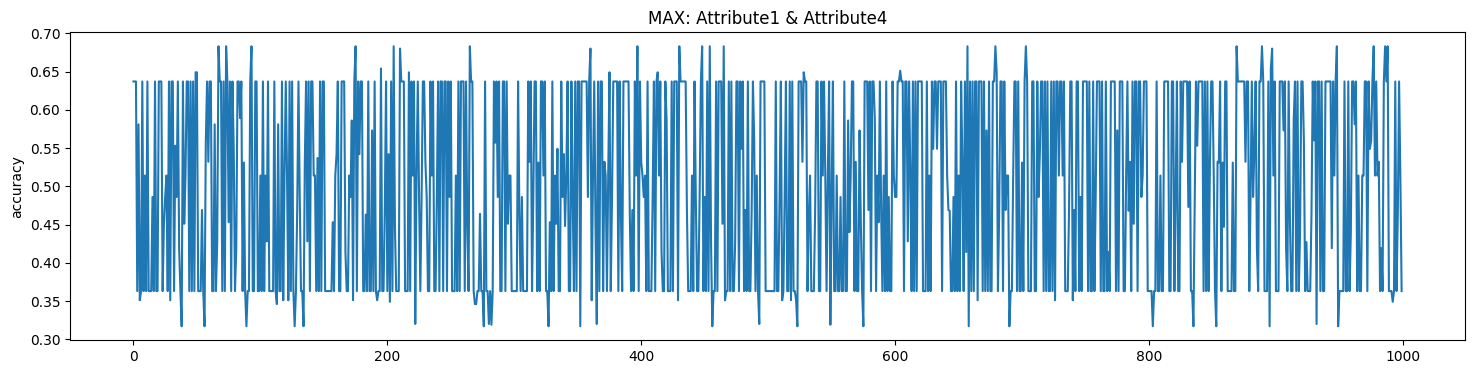

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(np.arange(1_000), acc_df['Attribute4'])
plt.title('MAX: Attribute1 & Attribute4')
plt.ylabel('accuracy')

In [ ]:
df = pd.DataFrame(data=norm.fit_transform(X.loc[:, ~X.columns.isin(le)]),
                  columns=X.loc[:, ~X.columns.isin(le)].columns)
df.head()

Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0   -1.236478   -0.745131    0.918477     1.046987     2.766456     1.027079   
1    2.248194    0.949817   -0.870183    -0.765977    -1.191404    -0.704926   
2   -0.738668   -0.416562   -0.870183     0.140505     1.183312    -0.704926   
3    1.750384    1.634247   -0.870183     1.046987     0.831502    -0.704926   
4    0.256953    0.566664    0.024147     1.046987     1.535122     1.027079   

   Attribute18  
0    -0.428290  
1    -0.428290  
2     2.334869  
3     2.334869  
4     2.334869

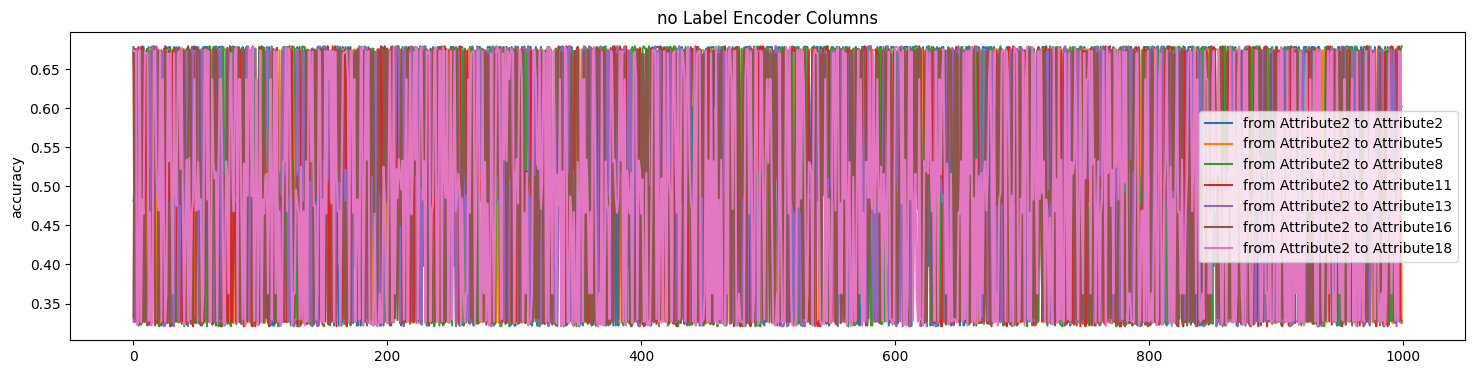

In [ ]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))
for col in df.columns:
    for _ in range(1_000):
        model.fit(df.loc[:, df.columns[0]:col])
        acc_results[col].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[col], label=f'from {df.columns[0]} to {col}')

plt.title('no Label Encoder Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
acc_df.head()

Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0       0.678       0.674       0.482        0.673        0.327        0.331   
1       0.602       0.674       0.482        0.327        0.327        0.676   
2       0.602       0.674       0.673        0.327        0.673        0.669   
3       0.398       0.675       0.327        0.673        0.676        0.479   
4       0.322       0.675       0.327        0.678        0.328        0.325   

   Attribute18  
0        0.673  
1        0.673  
2        0.673  
3        0.323  
4        0.328

In [ ]:
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute2   0.678  0.536276  0.322
Attribute5   0.675  0.557684  0.325
Attribute8   0.679  0.522925  0.321
Attribute11  0.679  0.516925  0.321
Attribute13  0.679  0.502462  0.321
Attribute16  0.677  0.491174  0.323
Attribute18  0.678  0.491817  0.322

In [ ]:
selected_columns = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute2', 'Attribute5']
X[selected_columns].head()

Attribute1 Attribute3 Attribute4  Attribute2  Attribute5
0          3         29         34           6        1169
1          4         27         34          48        5951
2         10         29         37          12        2096
3          3         27         33          42        7882
4          3         28         30          24        4870

<ipython-input-26-3f1350b8bef7>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


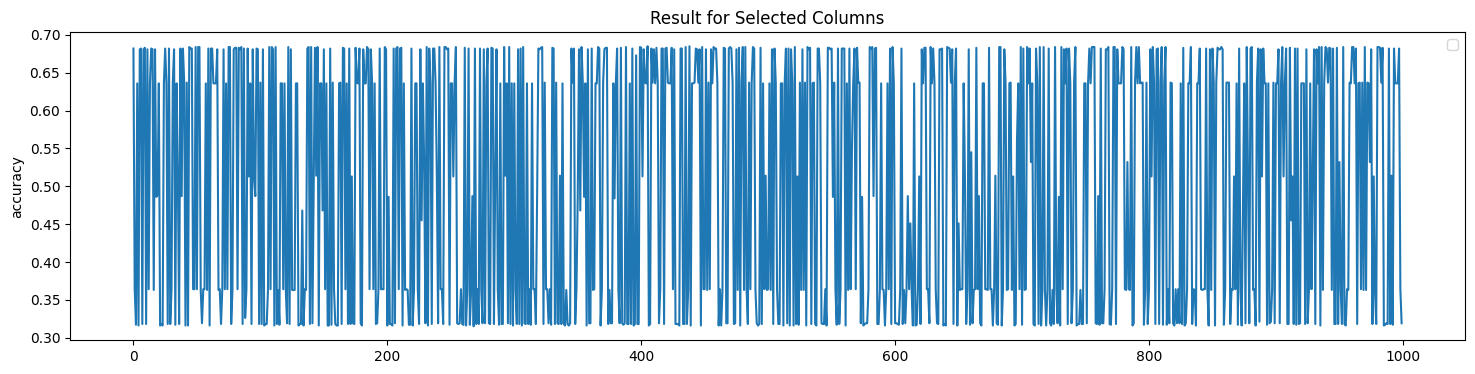

In [ ]:
data = norm.fit_transform(X[selected_columns])

model = KMeans(n_clusters=2)

acc_results = []
plt.figure(figsize=(18, 4))

for _ in range(1_000):
    model.fit(data)
    acc_results.append(accuracy_score(y, model.labels_+1))

plt.plot(np.arange(1_000), acc_results)
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
0  0.685  0.498945  0.315

<ipython-input-28-f063272acaf2>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


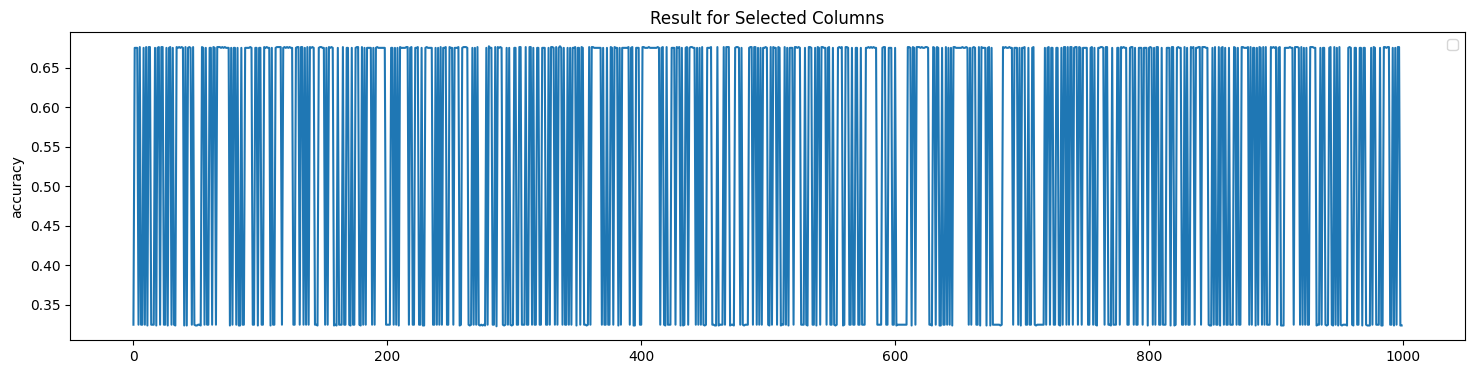

In [ ]:
data = robust.fit_transform(X[selected_columns])

model = KMeans(n_clusters=2)

acc_results = []
plt.figure(figsize=(18, 4))

for _ in range(1_000):
    model.fit(data)
    acc_results.append(accuracy_score(y, model.labels_+1))

plt.plot(np.arange(1_000), acc_results)
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
0  0.677  0.527429  0.323

## Combinations from selected columns

In [21]:
from itertools import combinations

selected_columns = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute2', 'Attribute5']

combs = []
for l in [2, 3, 4]:
    combs.extend(list(combinations(selected_columns, l)))


<ipython-input-30-2553775901>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


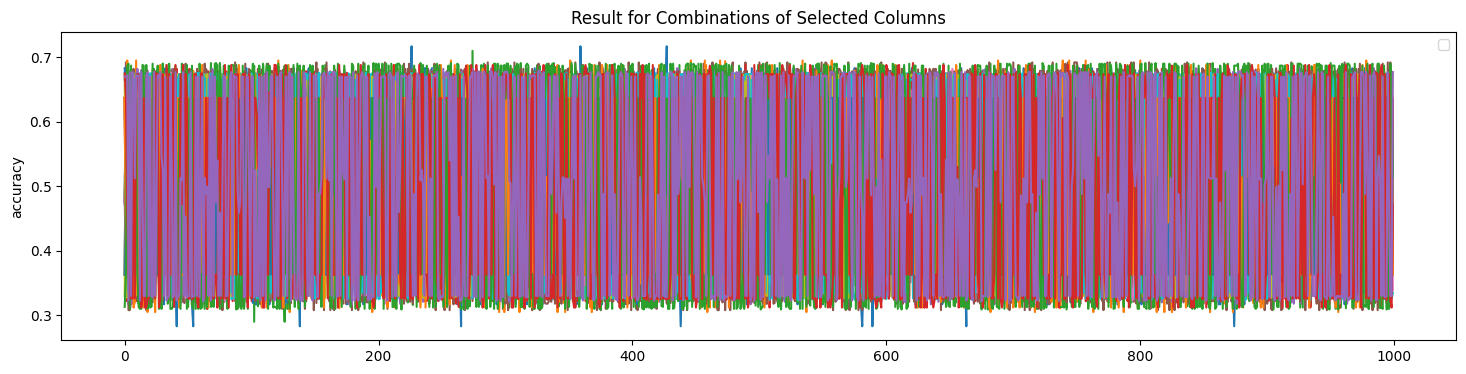

In [30]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))

for cols in combs:
    data = norm.fit_transform(X[[*cols]])
    for _ in range(1_000):
        model.fit(data)
        acc_results[cols].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[cols])

plt.title('Result for Combinations of Selected Columns')
plt.ylabel('accuracy')
plt.legend()


In [38]:
acc_df = pd.DataFrame(data={'_'.join(key): value for key, value in acc_results.items()})
acc_df.head()

Attribute1_Attribute3  Attribute1_Attribute4  Attribute1_Attribute2  \
0                  0.363                  0.363                  0.363   
1                  0.637                  0.637                  0.363   
2                  0.363                  0.363                  0.637   
3                  0.317                  0.637                  0.363   
4                  0.363                  0.637                  0.637   

   Attribute1_Attribute5  Attribute3_Attribute4  Attribute3_Attribute2  \
0                  0.637                  0.479                  0.475   
1                  0.322                  0.543                  0.692   
2                  0.363                  0.450                  0.640   
3                  0.637                  0.351                  0.308   
4                  0.678                  0.475                  0.308   

   Attribute3_Attribute5  Attribute4_Attribute2  Attribute4_Attribute5  \
0                  0.475                  0.483                  0.330   
1                  0.525                  0.348                  0.670   
2                  0.525                  0.661                  0.670   
3                  0.673                  0.573                  0.670   
4                  0.673                  0.652                  0.348   

   Attribute2_Attribute5  ...  Attribute1_Attribute2_Attribute5  \
0                  0.675  ...                             0.637   
1                  0.674  ...                             0.363   
2                  0.674  ...                             0.682   
3                  0.674  ...                             0.678   
4                  0.325  ...                             0.637   

   Attribute3_Attribute4_Attribute2  Attribute3_Attribute4_Attribute5  \
0                             0.516                             0.615   
1                             0.525                             0.525   
2                             0.664                             0.475   
3                             0.647                             0.518   
4                             0.644                             0.475   

   Attribute3_Attribute2_Attribute5  Attribute4_Attribute2_Attribute5  \
0                             0.673                             0.665   
1                             0.330                             0.665   
2                             0.327                             0.665   
3                             0.508                             0.335   
4                             0.327                             0.335   

   Attribute1_Attribute3_Attribute4_Attribute2  \
0                                        0.363   
1                                        0.637   
2                                        0.363   
3                                        0.363   
4                                        0.637   

   Attribute1_Attribute3_Attribute4_Attribute5  \
0                                        0.637   
1                                        0.363   
2                                        0.363   
3                                        0.514   
4                                        0.472   

   Attribute1_Attribute3_Attribute2_Attribute5  \
0                                        0.313   
1                                        0.364   
2                                        0.687   
3                                        0.690   
4                                        0.310   

   Attribute1_Attribute4_Attribute2_Attribute5  \
0                                        0.675   
1                                        0.637   
2                                        0.472   
3                                        0.363   
4                                        0.326   

   Attribute3_Attribute4_Attribute2_Attribute5  
0                                        0.670  
1                                        0.670  
2                                   

In [41]:
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute1_Attribute3                        0.717  0.483879  0.283
Attribute1_Attribute4                        0.652  0.490258  0.348
Attribute1_Attribute2                        0.710  0.498358  0.290
Attribute1_Attribute5                        0.678  0.499821  0.322
Attribute3_Attribute4                        0.651  0.497115  0.349
Attribute3_Attribute2                        0.692  0.506186  0.308
Attribute3_Attribute5                        0.673  0.513961  0.327
Attribute4_Attribute2                        0.669  0.518302  0.331
Attribute4_Attribute5                        0.670  0.528110  0.330
Attribute2_Attribute5                        0.675  0.565705  0.325
Attribute1_Attribute3_Attribute4             0.683  0.486304  0.317
Attribute1_Attribute3_Attribute2             0.695  0.493222  0.305
Attribute1_Attribute3_Attribute5             0.691  0.496556  0.309
Attribute1_Attribute4_Attribute2             0.691  0.494208  0.310
Attribute1_Attribute4_Attribute5             0.683  0.500977  0.317
Attribute1_Attribute2_Attribute5             0.683  0.507629  0.317
Attribute3_Attribute4_Attribute2             0.682  0.499300  0.318
Attribute3_Attribute4_Attribute5             0.675  0.503152  0.325
Attribute3_Attribute2_Attribute5             0.674  0.529197  0.326
Attribute4_Attribute2_Attribute5             0.677  0.541698  0.323
Attribute1_Attribute3_Attribute4_Attribute2  0.637  0.498245  0.363
Attribute1_Attribute3_Attribute4_Attribute5  0.688  0.496156  0.311
Attribute1_Attribute3_Attribute2_Attribute5  0.690  0.508448  0.310
Attribute1_Attribute4_Attribute2_Attribute5  0.688  0.498941  0.312
Attribute3_Attribute4_Attribute2_Attribute5  0.678  0.507988  0.322

<ipython-input-42-1223838849>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


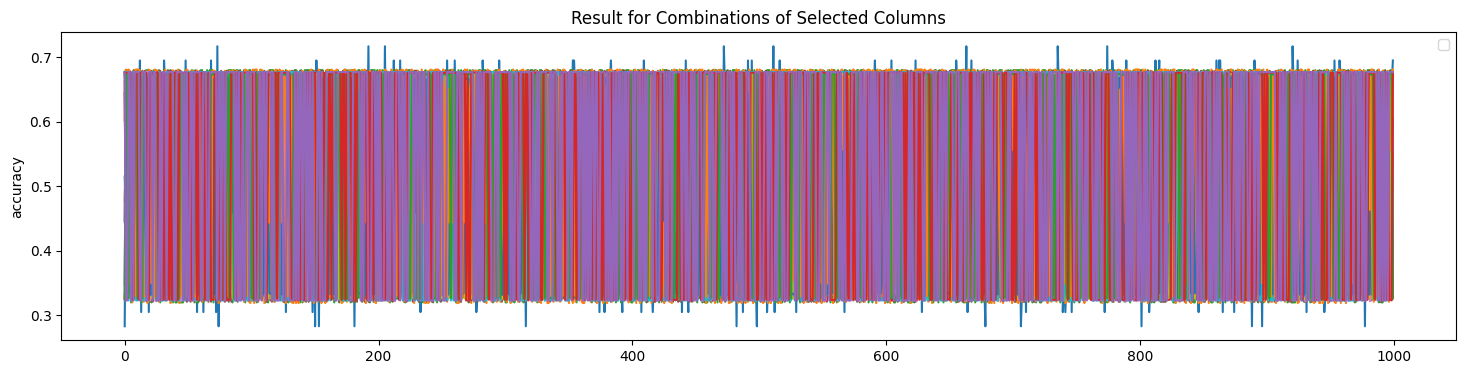

In [42]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))

for cols in combs:
    data = robust.fit_transform(X[[*cols]])
    for _ in range(1_000):
        model.fit(data)
        acc_results[cols].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[cols])

plt.title('Result for Combinations of Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [43]:
acc_df = pd.DataFrame(data={'_'.join(key): value for key, value in acc_results.items()})
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute1_Attribute3                        0.717  0.503630  0.283
Attribute1_Attribute4                        0.652  0.525546  0.348
Attribute1_Attribute2                        0.680  0.535853  0.320
Attribute1_Attribute5                        0.672  0.578432  0.328
Attribute3_Attribute4                        0.652  0.520440  0.348
Attribute3_Attribute2                        0.679  0.531751  0.321
Attribute3_Attribute5                        0.672  0.577437  0.328
Attribute4_Attribute2                        0.677  0.522188  0.323
Attribute4_Attribute5                        0.670  0.540727  0.330
Attribute2_Attribute5                        0.675  0.561339  0.325
Attribute1_Attribute3_Attribute4             0.652  0.513462  0.348
Attribute1_Attribute3_Attribute2             0.681  0.542955  0.319
Attribute1_Attribute3_Attribute5             0.672  0.565174  0.328
Attribute1_Attribute4_Attribute2             0.677  0.529543  0.323
Attribute1_Attribute4_Attribute5             0.671  0.527058  0.329
Attribute1_Attribute2_Attribute5             0.678  0.551098  0.322
Attribute3_Attribute4_Attribute2             0.678  0.521935  0.322
Attribute3_Attribute4_Attribute5             0.670  0.528824  0.330
Attribute3_Attribute2_Attribute5             0.674  0.554636  0.326
Attribute4_Attribute2_Attribute5             0.677  0.541418  0.323
Attribute1_Attribute3_Attribute4_Attribute2  0.669  0.512056  0.331
Attribute1_Attribute3_Attribute4_Attribute5  0.671  0.527976  0.329
Attribute1_Attribute3_Attribute2_Attribute5  0.675  0.562393  0.325
Attribute1_Attribute4_Attribute2_Attribute5  0.676  0.544704  0.324
Attribute3_Attribute4_Attribute2_Attribute5  0.677  0.538583  0.323

## Exclude 2 5 13

In [14]:
exclude_cols = ['Attribute2', 'Attribute5', 'Attribute13']
data = pd.DataFrame(data=norm.fit_transform(X.loc[:, ~X.columns.isin(exclude_cols)]),
                  columns=X.loc[:, ~X.columns.isin(exclude_cols)].columns)
data.head()

Attribute1  Attribute3  Attribute4  Attribute6  Attribute7  Attribute8  \
0   -1.063596    1.344014    0.264068    1.833169    1.338078    0.918477   
1   -0.751233   -0.503428    0.264068   -0.699707   -0.317959   -0.870183   
2    1.122945    1.344014    1.359785   -0.699707    0.510060   -0.870183   
3   -1.063596   -0.503428   -0.101171   -0.699707    0.510060   -0.870183   
4   -1.063596    0.420293   -1.196889   -0.699707   -0.317959    0.024147   

   Attribute9  Attribute10  Attribute11  Attribute12  Attribute14  \
0    0.449326    -0.303686     1.046987    -1.293723     0.460831   
1   -0.963650    -0.303686    -0.765977    -1.293723     0.460831   
2    0.449326    -0.303686     0.140505    -1.293723     0.460831   
3    0.449326     3.885083     1.046987    -0.341055     0.460831   
4    0.449326    -0.303686     1.046987     1.564281     0.460831   

   Attribute15  Attribute16  Attribute17  Attribute18  Attribute19  \
0     0.133710     1.027079     0.146949    -0.428290     1.214598   
1     0.133710    -0.704926     0.146949    -0.428290    -0.823318   
2     0.133710    -0.704926    -1.383771     2.334869    -0.823318   
3     2.016956    -0.704926     0.146949     2.334869    -0.823318   
4     2.016956     1.027079     0.146949     2.334869    -0.823318   

   Attribute20  
0    -0.196014  
1    -0.196014  
2    -0.196014  
3    -0.196014  
4    -0.196014

<ipython-input-15-4049486569>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


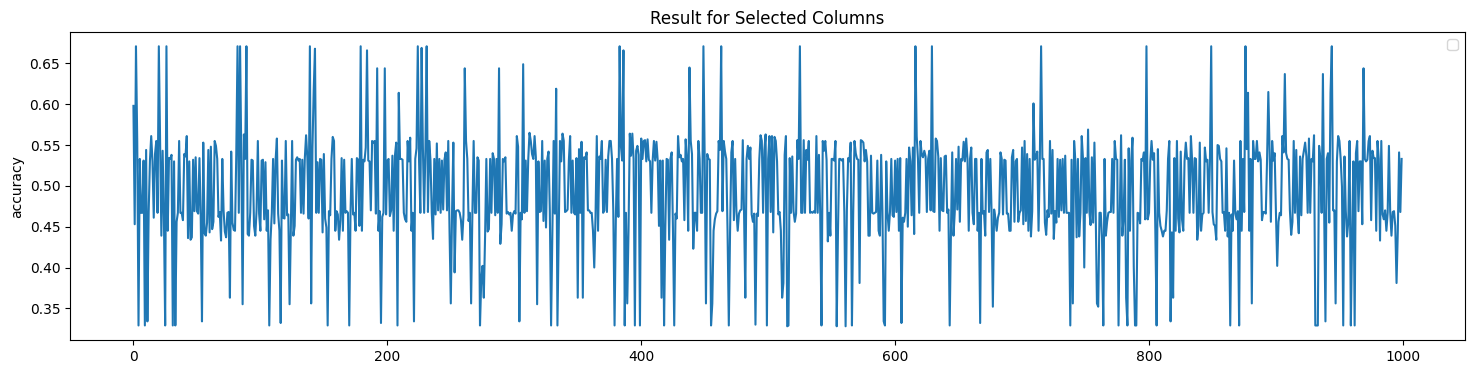

In [15]:
model = KMeans(n_clusters=2)

acc_results = []
plt.figure(figsize=(18, 4))

for _ in range(1_000):
    model.fit(data)
    acc_results.append(accuracy_score(y, model.labels_+1))

plt.plot(np.arange(1_000), acc_results)
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [16]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
0  0.671  0.492734  0.328